In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv(r"2015-2019_sensorData.csv",
                 usecols=['Stop','Station Name','PM10'])
# selecting station #Stockholm E4/E20 Lilla Essingen
#df = df[df['Station Name']=='#Stockholm Torkel Knutssongatan']
# Rename Stop to Time
df = df.rename(columns={"Stop": "Timestamp"})
# convert columns to date
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df2=df[(df['Timestamp']> "2019-08-31 23:00:00")] 
df=df[(df['Timestamp']<= "2018-12-31 23:00:00")] 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354275 entries, 0 to 354284
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Timestamp     354275 non-null  datetime64[ns]
 1   Station Name  354275 non-null  object        
 2   PM10          206892 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 10.8+ MB


In [74]:
df.describe()

,PM10
count,206892.000000
mean,19.269404
std,19.533088
min,-3.040000
25%,8.400000
50%,13.800000
75%,22.800000
max,447.600000


<AxesSubplot:xlabel='Timestamp'>

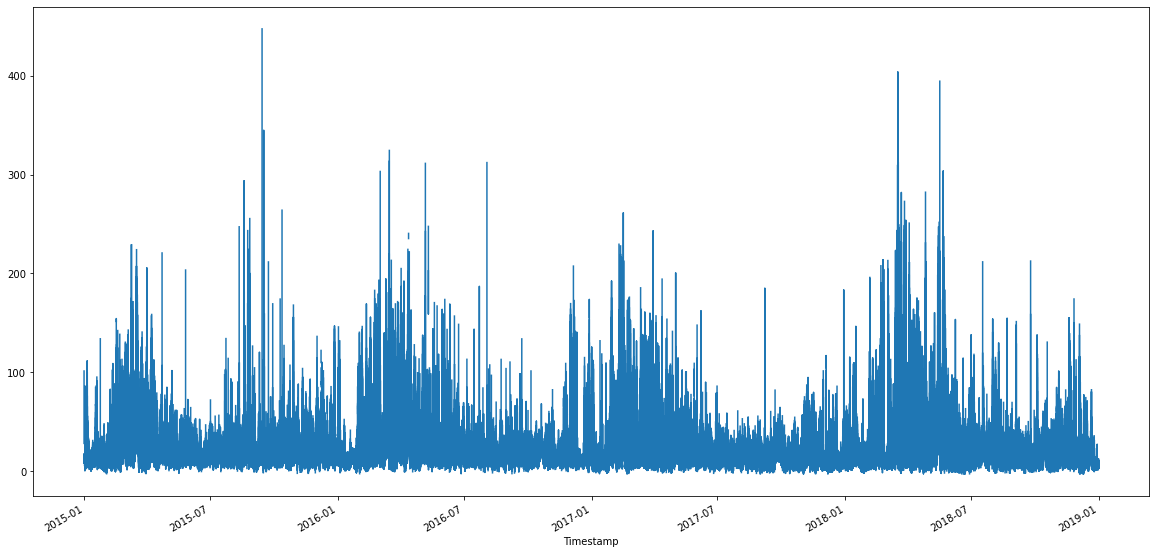

In [75]:
# Time Series of Raw data with outliers
pd1 = df
pd1 = pd1.set_index("Timestamp")
pd1['PM10'].plot(figsize = (20,10))

c:\users\jad\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
c:\users\jad\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.
c:\users\jad\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


<Figure size 432x288 with 0 Axes>

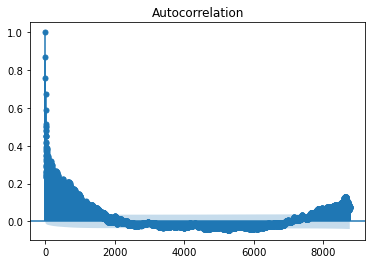

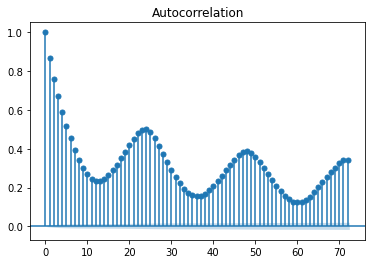

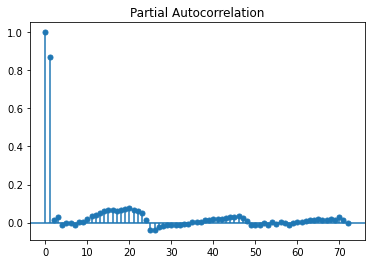

In [76]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
figsize=(0,10)
# autocorrelation plot for 365 days
f1 = plt.figure(1)
plot_acf(pd1['PM10'].dropna(), lags=8760)
f1.show()
# autocorrelation plot for 1 days
f2 = plt.figure(2)
plot_acf(pd1['PM10'].dropna(), lags=72)
f2.show()
# partialautocorrelation plot for 1 days 
f3 = plt.figure(3)
plot_pacf(pd1['PM10'].dropna(), lags=72)
f3.show()

In [77]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Modyfying data for traning LSTM 
# selecting PM10 column
data_set  = df.iloc[:,2].values
# replace missing values with -1 (later used to mask nan)
nan_index  = np.isnan(data_set)
data_set[np.isnan(data_set)] = -1
print(data_set)
data_set  = data_set.reshape(-1,1)
print("Shape:\n",data_set.shape)
print("Data Set:\n",data_set[0:4])
# Normalisation of Data
sc = MinMaxScaler(feature_range = (0, 1))
data_set_scaled = sc.fit_transform(data_set)
print("Normalised Data Set:\n",data_set_scaled[0:4])
# Generating LSTM featurse with Lag and Y
X = []
y = []
for i in range(5, len(data_set)):
    X.append(data_set_scaled[i-5:i, 0])
    y.append(data_set_scaled[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
print("X:\n",X[0:2])
print("y:\n",y[0:2])

[57.  13.  12.8 ...  7.8  7.4  6.7]
Shape:
 (354275, 1)
Data Set:
 [[57. ]
 [13. ]
 [12.8]
 [13.9]]
Normalised Data Set:
 [[0.13323274]
 [0.03559382]
 [0.03515001]
 [0.03759098]]
X:
 [[[0.13323274]
  [0.03559382]
  [0.03515001]
  [0.03759098]
  [0.03803479]]

 [[0.03559382]
  [0.03515001]
  [0.03759098]
  [0.03803479]
  [0.03870051]]]
y:
 [0.03870051 0.03625954]


In [79]:
## Modyfying data for traning LSTM 
# selecting PM10 column
data_set_2  = df2.iloc[:,2].values
# replace missing values with -1 (later used to mask nan)
nan_index  = np.isnan(data_set_2)
data_set_2[np.isnan(data_set_2)] = -1
print(data_set_2)
data_set_2  = data_set_2.reshape(-1,1)
print("Shape:\n",data_set_2.shape)
print("Data Set:\n",data_set_2[0:4])
# Normalisation of Data
sc = MinMaxScaler(feature_range = (0, 1))
data_set_scaled_2 = sc.fit_transform(data_set_2)
print("Normalised Data Set:\n",data_set_scaled_2[0:4])
# Generating LSTM featurse with Lag and Y
X_2 = []
y_2 = []
for i in range(5, len(data_set_2)):
    X_2.append(data_set_scaled_2[i-5:i, 0])
    y_2.append(data_set_scaled_2[i, 0])
X_2, y_2 = np.array(X_2), np.array(y_2)
X_2 = np.reshape(X_2, (X_2.shape[0], X_2.shape[1], 1))
print("X:\n",X_2[0:2])
print("y:\n",y_2[0:2])

[17.3 17.2 17.1 ...  3.   2.8  4.6]
Shape:
 (32219, 1)
Data Set:
 [[17.3]
 [17.2]
 [17.1]
 [16.6]]
Normalised Data Set:
 [[0.12288136]
 [0.12227603]
 [0.1216707 ]
 [0.11864407]]
X:
 [[[0.12288136]
  [0.12227603]
  [0.1216707 ]
  [0.11864407]
  [0.11924939]]

 [[0.12227603]
  [0.1216707 ]
  [0.11864407]
  [0.11924939]
  [0.10956416]]]
y:
 [0.10956416 0.09079903]


In [85]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Masking

## LSTM Architecture
# input layer
model = Sequential()
# 1
model.add(Masking(mask_value=-1, input_shape = (X.shape[1], 1)))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# 2
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# 3
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# 4
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# output layer
model.add(Dense(units = 1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 5, 1)              0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 5, 50)             10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 50)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 5, 1)              51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [88]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
# Creating an empty Dataframe with column names only
plotData = pd.DataFrame(columns=['Train_size','Test_size','Train_RMSE','Test_RMSE'])

# 20%  40% 60% 80% 100%
for i in range(2,101,2):
    tf.keras.backend.clear_session()
    model = Sequential()
    # 1
    model.add(Masking(mask_value=-1, input_shape = (X.shape[1], 1)))
    model.add(LSTM(units = 50, return_sequences = False))
    model.add(Dropout(0.2))
    # 2

    model.add(Dense(units = 1))
    model.summary()
    print(str(i)+' % of the Data')
    slice_len = round(X.shape[0]*(i/100))
    print('No of total entires: '+str(slice_len))
    train_test_len = round(slice_len*(0.5))-1
    print('No of train & test entires: '+str(train_test_len))
    print("TRAIN:", (0,train_test_len), "TEST:", (train_test_len,train_test_len+int(train_test_len*2)))
    
    # Compile LSTM Model
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer = opt, loss = 'mean_squared_error')
    # Train the model on the data
    model.fit(X[0:train_test_len], y[0:train_test_len], epochs = 5, batch_size = 128)
    
    ## Train RMSE
    # predicting PM10
    predicted_y = model.predict(X[0:train_test_len])
    # De-normalising predicted y data
    predicted_y = sc.inverse_transform(predicted_y)
    # De-normalising actual y data
    y_actual = sc.inverse_transform(y[0:train_test_len].reshape(-1,1))
    # calculating TEST RMSE
    train_rmse = sqrt(mean_squared_error(y_actual, predicted_y))
    print('TRAIN RMSE: '+str(train_rmse))
    
    ## Test RMSE
    # predicting PM10
    predicted_2_y = model.predict(X_2)
    # De-normalising predicted y data
    predicted_2_y = sc.inverse_transform(predicted_2_y)
    # De-normalising actual y data
    y_2_actual = sc.inverse_transform(y_2.reshape(-1,1))
    # calculating TEST RMSE
    test_rmse = sqrt(mean_squared_error(y_2_actual, predicted_2_y))
    print('TEST RMSE: '+str(test_rmse))
    
    # Append rows in Empty Dataframe by adding dictionaries
    plotData = plotData.append({'Train_size':train_test_len,'Test_size':train_test_len,'Train_RMSE':train_rmse,'Test_RMSE':test_rmse}, ignore_index=True)
    
    print('\n')


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 5, 1)              0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
2 % of the Data
No of total entires: 7085
No of train & test entires: 3541
TRAIN: (0, 3541) TEST: (3541, 10623)
Epoch 1/5
28/28 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 2/5
28/28 [==============================] - 0s 8ms/st

167/167 [==============================] - 1s 8ms/step - loss: 5.6410e-04
Epoch 2/5
167/167 [==============================] - 2s 9ms/step - loss: 4.5209e-04
Epoch 3/5
167/167 [==============================] - 2s 9ms/step - loss: 4.2385e-04
Epoch 4/5
167/167 [==============================] - 1s 9ms/step - loss: 4.1912e-04
Epoch 5/5
167/167 [==============================] - 1s 8ms/step - loss: 4.0556e-04
TRAIN RMSE: 3.4477439203196547
TEST RMSE: 4.709551826200554


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 5, 1)              0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
______________________________________________

333/333 [==============================] - 3s 9ms/step - loss: 2.8197e-04
Epoch 2/5
333/333 [==============================] - 3s 9ms/step - loss: 2.1592e-04
Epoch 3/5
333/333 [==============================] - 3s 9ms/step - loss: 2.0946e-04
Epoch 4/5
333/333 [==============================] - 3s 9ms/step - loss: 1.9930e-04
Epoch 5/5
333/333 [==============================] - 3s 9ms/step - loss: 2.0316e-04
TRAIN RMSE: 2.2625184643198697
TEST RMSE: 4.568503879242942


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 5, 1)              0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
______________________________________________

499/499 [==============================] - 4s 8ms/step - loss: 3.4385e-04
Epoch 2/5
499/499 [==============================] - 4s 8ms/step - loss: 2.9672e-04
Epoch 3/5
499/499 [==============================] - 4s 8ms/step - loss: 2.8097e-04
Epoch 4/5
499/499 [==============================] - 4s 8ms/step - loss: 2.7878e-04
Epoch 5/5
499/499 [==============================] - 4s 8ms/step - loss: 2.7453e-04
TRAIN RMSE: 2.701178037719243
TEST RMSE: 3.9953738303874524


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 5, 1)              0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
______________________________________________

665/665 [==============================] - 6s 9ms/step - loss: 3.4533e-04
Epoch 2/5
665/665 [==============================] - 6s 9ms/step - loss: 2.9457e-04
Epoch 3/5
665/665 [==============================] - 6s 9ms/step - loss: 2.8545e-04
Epoch 4/5
665/665 [==============================] - 6s 9ms/step - loss: 2.8326e-04
Epoch 5/5
665/665 [==============================] - 6s 9ms/step - loss: 2.8204e-04
TRAIN RMSE: 2.664334253104421
TEST RMSE: 4.185172928569989


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 5, 1)              0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_______________________________________________

831/831 [==============================] - 7s 8ms/step - loss: 3.1895e-04
Epoch 2/5
831/831 [==============================] - 7s 9ms/step - loss: 2.8286e-04
Epoch 3/5
831/831 [==============================] - 7s 8ms/step - loss: 2.7937e-04
Epoch 4/5
831/831 [==============================] - 7s 8ms/step - loss: 2.7473e-04
Epoch 5/5
831/831 [==============================] - 7s 8ms/step - loss: 2.7578e-04
TRAIN RMSE: 2.7040606070361592
TEST RMSE: 4.441036470976085


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 5, 1)              0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
______________________________________________

997/997 [==============================] - 8s 8ms/step - loss: 2.7698e-04
Epoch 2/5
997/997 [==============================] - 8s 8ms/step - loss: 2.3436e-04
Epoch 3/5
997/997 [==============================] - 8s 8ms/step - loss: 2.3530e-04
Epoch 4/5
997/997 [==============================] - 8s 8ms/step - loss: 2.3139e-04
Epoch 5/5
997/997 [==============================] - 8s 8ms/step - loss: 2.2926e-04
TRAIN RMSE: 2.5533832619088526
TEST RMSE: 4.14422928378347


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 5, 1)              0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_______________________________________________

1163/1163 [==============================] - 9s 8ms/step - loss: 3.3557e-04
Epoch 2/5
1163/1163 [==============================] - 10s 8ms/step - loss: 3.0366e-04
Epoch 3/5
1163/1163 [==============================] - 9s 8ms/step - loss: 3.0057e-04
Epoch 4/5
1163/1163 [==============================] - 9s 8ms/step - loss: 2.9950e-04
Epoch 5/5
1163/1163 [==============================] - 9s 8ms/step - loss: 2.9739e-04
TRAIN RMSE: 2.7625222885167937
TEST RMSE: 4.04372611599235


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 5, 1)              0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
____________________________________

1329/1329 [==============================] - 10s 8ms/step - loss: 3.4359e-04
Epoch 2/5
1329/1329 [==============================] - 10s 8ms/step - loss: 3.0865e-04
Epoch 3/5
1329/1329 [==============================] - 10s 8ms/step - loss: 3.0595e-04
Epoch 4/5
1329/1329 [==============================] - 10s 8ms/step - loss: 3.0336e-04
Epoch 5/5
1329/1329 [==============================] - 10s 8ms/step - loss: 3.0117e-04
TRAIN RMSE: 2.802391026332221
TEST RMSE: 4.111015960918437


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 5, 1)              0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
________________________________

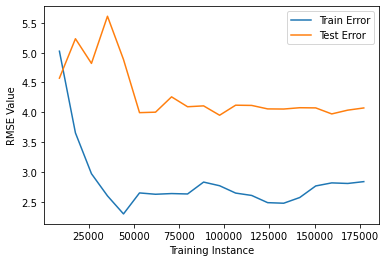

In [87]:
# Plot 
plt.plot(plotData.Train_size,plotData.Train_RMSE,label="Train Error")
plt.plot(plotData.Test_size,plotData.Test_RMSE,label="Test Error")
plt.xlabel('Training Instance')
plt.ylabel('RMSE Value')
plt.legend()
plt.show()

In [10]:
## splitting data into test and train
# len of the 
# td_percentage = 0.20
# test_size = int(len(X)*td_percentage)

# # segmenting 2018 may data
# start_date = '2018-01-01 00:00:00'
# end_date  = '2018-10-31 23:59:59'
# df_2 = df[(df['Timestamp'] >= start_date) & (df['Timestamp'] <= end_date)]
# # Data distribution Across Stations in 2015 month
# print('Data distribution Across Stations:')
# print(df_2.groupby(['Station Name']).aggregate(
#     'count').drop(['Timestamp','Classification'],1))
# df_2.groupby(['Station Name']).aggregate(
#     'count').drop(['Timestamp','Classification'],1).plot(figsize = (15,10),grid=True,subplots=True)

# X_train = X[0:X.shape[0]-test_size]
# y_train = y[0:X.shape[0]-test_size]
# X_test = X[0:test_size]
# y_test = y[0:test_size]

# print("X_train_shape:\n",X_train.shape)
# print("y_train_shape:\n",y_train.shape)
# print("X_test_shape:\n",X_test.shape)
# print("y_test_shape:\n",y_test.shape)

In [11]:
# # Train the model on the data
# model.fit(X_train, y_train, epochs = 10, batch_size = 128)

In [12]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# # predicting PM10
# predicted_y = model.predict(X_test)
# # De-normalising predicted y data
# predicted_y = sc.inverse_transform(predicted_y)
# # De-normalising actual y data
# y_actual = sc.inverse_transform(y_test.reshape(-1,1))
# # calculating RMSE
# rmse = sqrt(mean_squared_error(y_actual, predicted_y))
# rmse

In [13]:
# y_actual[0:15]

In [14]:
# predicted_y[0:15]

In [15]:
# plt.figure(figsize=(20,10))
# plt.plot(y_actual, color = 'black', label = 'PM10 Actual')
# plt.plot(predicted_y, color = 'red', label = 'PM10 Predicted')
# plt.title('PM10 Actual vs Predicted')
# plt.xlabel('Time')
# plt.ylabel('ug/m3')
# plt.legend()
# plt.show()

In [16]:
# model.save(r'G:\Uppsala Docs\period5&6\Models')

In [34]:
print("TRAIN:", (0,train_test_len), "TEST:", (train_test_len,train_test_len+train_test_len*0.1))

TRAIN: (0, 45063) TEST: (45063, 49569.3)


In [69]:
df=df[(df['Timestamp']<= "2018-12-31 23:00:00")] 

In [70]:
df2=

,Timestamp,Station Name,PM10
0,2015-01-01 01:00:00,#Stockholm Norrlandsgatan 29,57.0
1,2015-01-01 02:00:00,#Stockholm Norrlandsgatan 29,13.0
2,2015-01-01 03:00:00,#Stockholm Norrlandsgatan 29,12.8
3,2015-01-01 04:00:00,#Stockholm Norrlandsgatan 29,13.9
4,2015-01-01 05:00:00,#Stockholm Norrlandsgatan 29,14.1
...,...,...,...
354280,2018-12-31 19:00:00,#Stockholm Torkel Knutssongatan,6.0
354281,2018-12-31 20:00:00,#Stockholm Torkel Knutssongatan,4.8
354282,2018-12-31 21:00:00,#Stockholm Torkel Knutssongatan,7.8
354283,2018-12-31 22:00:00,#Stockholm Torkel Knutssongatan,7.4
